# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [ ]:
# importando bibliotecas

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score



# carregando arquivo e construindo DataFrame

arquivo = pd.read_csv('analise_credito.csv')
df_credito = pd.DataFrame(arquivo)

# informações sobre os dados

df_credito.head(5)

In [ ]:
# divisão dos dados em y e X

y = df_credito.mau
X = df_credito.drop('mau',axis=1)

In [ ]:
# separando treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [ ]:
# declarando a árvore de decisão "todas as variáveis"

clf = DecisionTreeClassifier(random_state=100)
clf

In [ ]:
# treinando a árvore "todas as variáveis"

clf = clf.fit(X,y)
clf

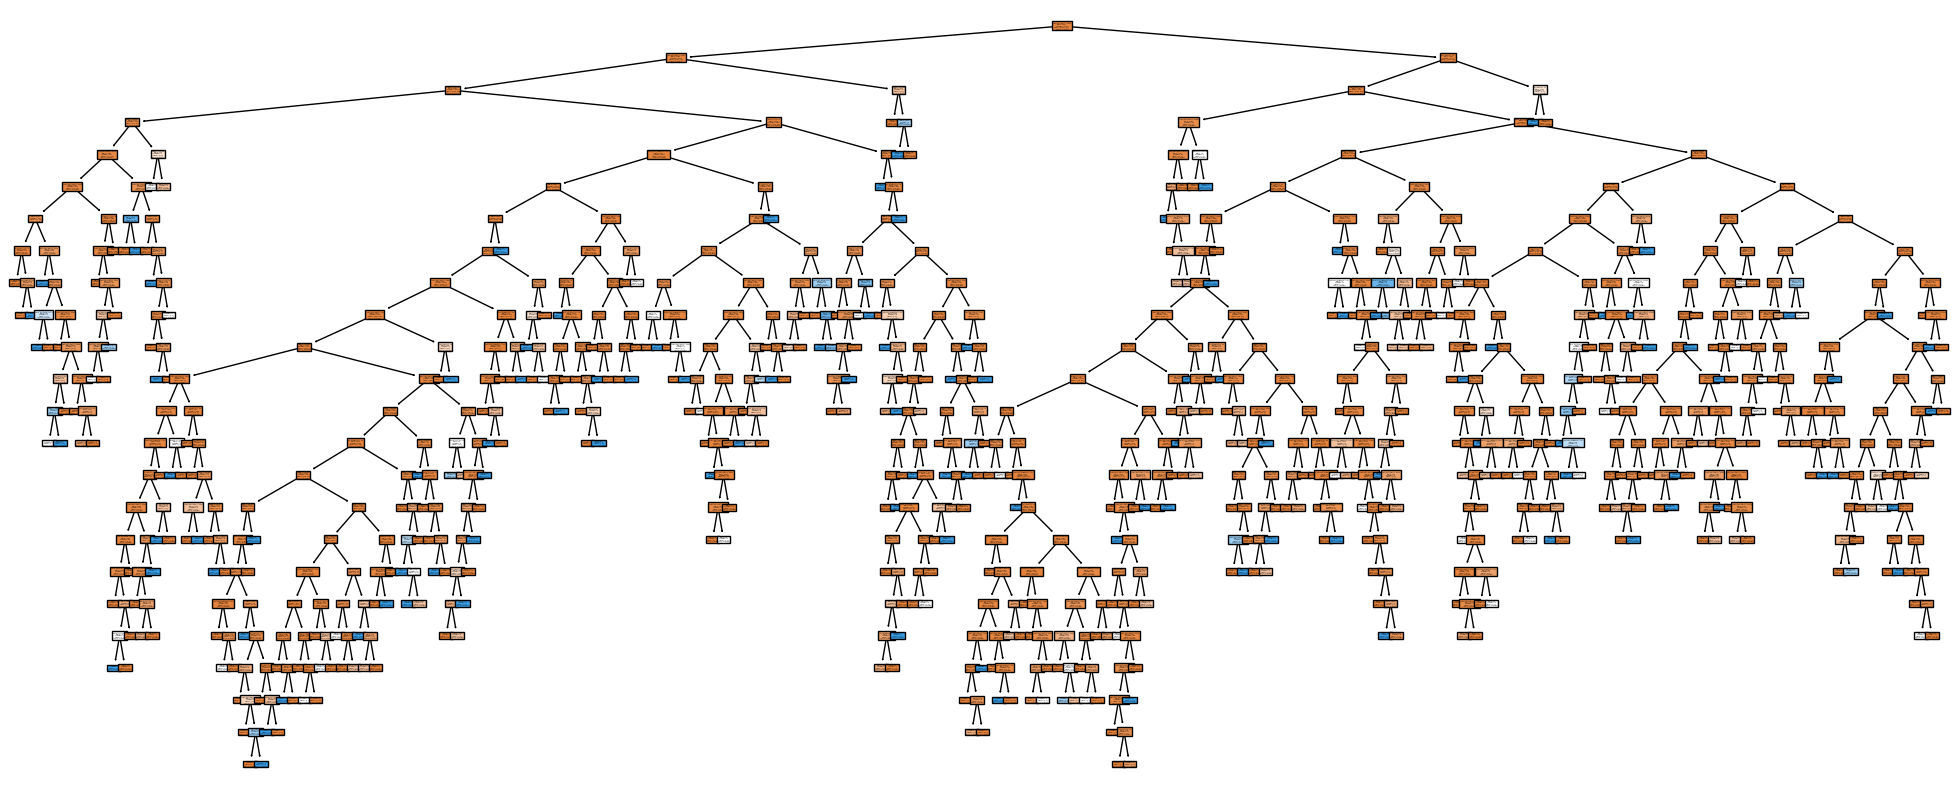

In [48]:
# matriz de classificação "todas as variáveis"

plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovado', 'Reprovado'],
          feature_names=X.columns);

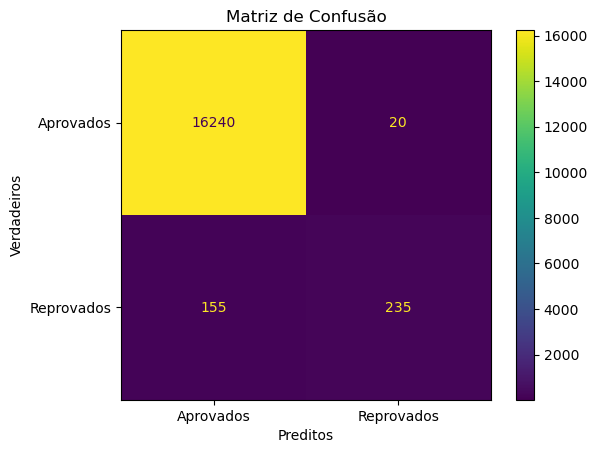

In [33]:
# matrix de confusão "todas as variáveis"

ConfusionMatrixDisplay.from_estimator(clf, X, y, display_labels=['Aprovados', 'Reprovados'])

plt.title('Matriz de Confusão')
plt.xlabel('Preditos')
plt.ylabel('Verdadeiros')
plt.show()

In [67]:
# acurácia "todas as variáveis"

predict = clf.predict(X)
acuracia = accuracy_score(y, predict)
print(f'A acurácia com todas as variáveis é: {acuracia:.4f}')


A acurácia com todas as variáveis é: 0.9769


#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [68]:
# treinando a árvore com 70% dos dados - (X_train,y_train)

clf = DecisionTreeClassifier(random_state=100)
clf = clf.fit(X_train,y_train)

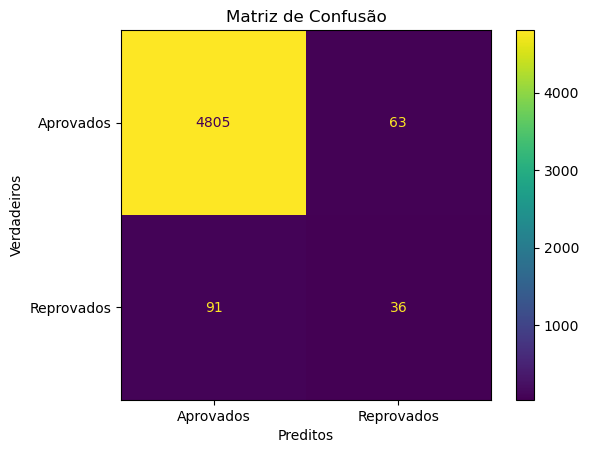

In [69]:
# matriz confusão 

ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados'])

plt.title('Matriz de Confusão')
plt.xlabel('Preditos')
plt.ylabel('Verdadeiros')
plt.show()

In [70]:
# acurácia do treino

predict = clf.predict(X_test)
acuracia = accuracy_score(y_test, predict)
print(f'A acurácia com o treino é: {acuracia:.4f}')


A acurácia com o treino é: 0.9692


In [71]:
# 4) treine a árvore com PRE PRUNING
# número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123

clf = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=123)
clf = clf.fit(X_train,y_train)
predict = clf.predict(X_test)   # y chapeu
acuracia = accuracy_score(y_test, predict)
print(f'A acurácia com PRE PRUNING é: {acuracia:.4f}')

A acurácia com PRE PRUNING é: 0.9726


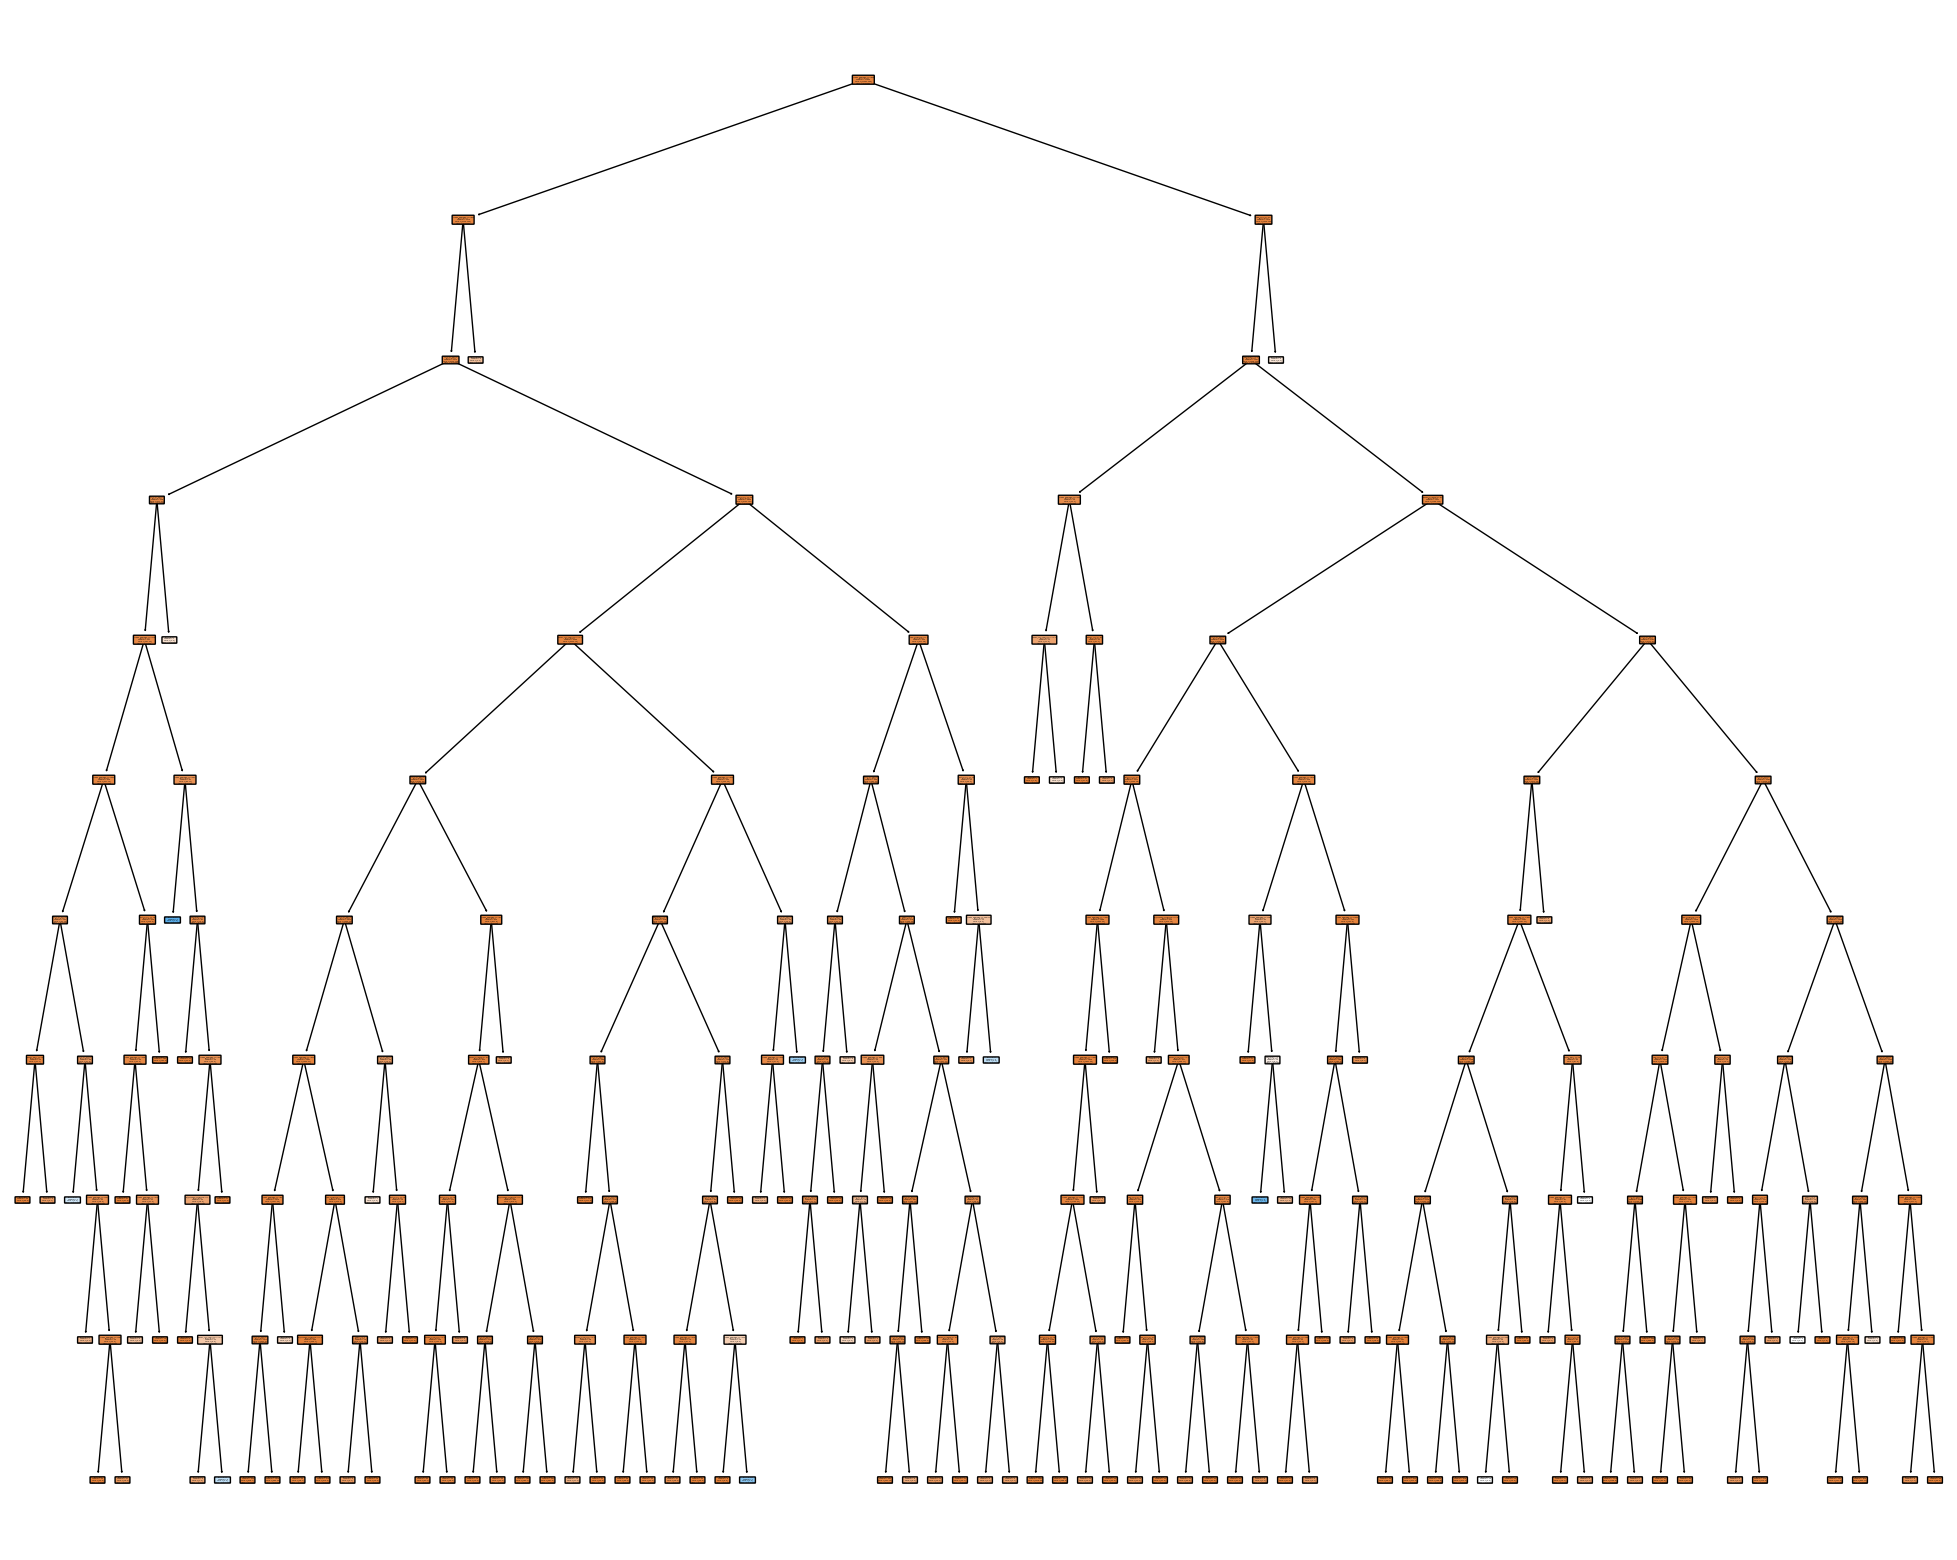

In [72]:
# matriz de classificação

plt.figure(figsize=[25,20])
plot_tree(clf,
         filled=True,
         rounded=True,
         class_names=['Aprovado', 'Reprovado'],
         feature_names=X_train.columns);

In [73]:
# porcentagem de aprovados e reprovados

porcentagem_aprovados = (((predict == 0).sum() / len(predict)) * 100)
porcentagem_reprovados = (((predict == 1).sum() / len(predict)) * 100)

print(f'A proporção de APROVADOS é: {porcentagem_aprovados:.2f} %')
print(f'A proporção de REPROVADOS é: {porcentagem_reprovados:.2f} %')

A proporção de APROVADOS é: 99.56 %
A proporção de REPROVADOS é: 0.44 %


# Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

A acurácia é obtida através das previsões tidas com corretas. Essas previsões são feitas a partir da base de dados levando em conta o valor que algoritmo apurou (y) e previsão do resultado (predict  ou y_chapéu) desta mesma variável. 

Supondo o cenário de termos 10 tuplas que originalmente tinham 7 classificações como "bons"  e 3 como "maus". Se em um segundo momento classificaríamos todos como "bons" a árvore não refletiria o desempenho real do modelo. 

Se pensarmos em termos matemáticos teríamos o cenário de termos 7 acertos para "bons" com a acurácia de 70%, Já no caso de termos 3 "maus" com a acurácia  de 0%. Somando as acurácias teríamos 70% + 0%, ou seja, 70% de acurácia total.

Mudar a classificação para "bons" poderiam desbalancear a árvore e consequentemente comprometer o desempenho do modelo. E uma acurácia muito alta pode significar que a árvore está muito treinada e portando está em  overfitting.

